In [1]:
# Calculating return
c0 = -10  # cash outflow at t=0 is -10, meaning we invested 10.
c1 = 12  # at t=1 we have a cash flow of 12 from our investment.

c = (c0, c1)  # payoff vector of the investment at t=0 and t=1, respectively.

R = c[0] + c[1]  # Net return in dollars.
r = R / abs(c[0])  # Final rate of return is the sum of all cash flows (net return) divided by absolute value of the cash outflow at t=0.

print("Payoff vector :", c)
print("Net return:", R)
print("Final rate of return of our investment at t=1 :", r)

Payoff vector : (-10, 12)
Net return: 2
Final rate of return of our investment at t=1 : 0.2


## Present Value and Discounting ##

Discounting can be defined as a function $D$ which maps a cash flow in one year in the future $c_1$ to an appropriate present value today. \
$D(c_1) = \large\frac{c_1}{1 + i} = c_0 $ \
\
and therefore, \
\
$c_1 = c_0(1+i) \iff c_0 = \large\frac{c_1}{1 + i}$
\
\
where $i$ is the interest rate.

In [2]:
c1 = 11  # cash flow in one year
i = 0.1  # interest rate

def D(c1, i):
    """ Discounts cash flow in one year in the future to a present value today.

    Args:
        c1 (float): cash flow in one year
        i (float): interest rate

    Returns:
        c0 (float): present value of the future cash flow c1
    """
    c0 = c1/(1+i)
    return c0

In [3]:
D(c1, i)  # present value of a cash flow of 11 is 10.

10.0

## Net Present Value ##

Net Present Value (NPV) is equal to sum of the present value of all cash flows.

$NPV(c) = c_0 + D(c_1)$ \
\
where \
\
$c$: vector of all cash flows. In our two-state economy it is $c = (c_0, c_1)$ \
$D(c_1)$: Discounted present value of the cash flow at $t=1$

If the Net Present Value (NPV) of the cash flows of a project is **positive**, then \
that project should be conducted. However if NPV is negative, then it should **not** \
be conducted because the money would be better in a deposit earning interest $i$ .

In [4]:
def NPV(c, i):
    """Calculates the net present value of a cash flow vector in a two-state economy.

    Args:
        c (tuple or list or ndarray): cash flow vector
        i (float): interest rate

    Returns:
        npv (float): Net present value of all cash flows
    """
    npv = c[0] + D(c[1], i)
    
    if npv >= 0:
        print("NPV is", round(npv, 2), "and positive, so the project should be conducted.")
    else:
        print("NPV is", round(npv, 2), "and negative, so the project should NOT be conducted.")
    return npv

In [5]:
i = 0.1
cA = (-10.5, 12.1)  # cash flow for project A
cB = (-10.5, 11)  # cash flow for project B

NPV(cA, i)

NPV is 0.5 and positive, so the project should be conducted.


0.4999999999999982

In [6]:
NPV(cB, i)

NPV is -0.5 and negative, so the project should NOT be conducted.


-0.5

## Uncertainty ##

If we add uncertainty to cash flows, let's say the future cash flow of $c_1$ has two possible states: **up** state or **down** state. \
Then, the cash flow $c_1$ at $t=1$ becomes a vector where it can take two values: $c_1^u$ if up state happens or $c_1^d$ if down state happens. \
\
$c_1 = \large(c_1^u, c_1^d)$

Example: consider an investment project where the investment at $t=0$ is a cash flow of $c_0 = -10$ and \
vector of possible cash flows at $t=1$ is $c_1 = (20, 5)^T$ where the superscript $T$ means the vector $c_1$ is a **column** vector. \
\
**Important Note:** 1-dimensional ndarray objects do not distinguish between row or column vector !! (no need to transpose for 1d arrays)

In [7]:
import numpy as np

c0 = -10  # initial investment as the negative cashflow at t=0
c1 = np.array((20, 5))  # vector of possible cash flows at t=1. 1-dimensional ndarray objects do not distinguish between row or column vector.

c = (c0, c1)
print(c)

(-10, array([20,  5]))


## Financial Assets ##

Price process of a financial asset in a two-state economy can be defined as: \
\
$S = (S_0, S_1)$ \
\
where \
\
$S:$ Price process vector of the asset $S$ \
$S_0:$ Price of the asset at $t=0$, which is a real number (float).\
$S_1:$ Future price of the asset at $t=1$, which is a vector consisting of two possible states $S_1^u$ and $S_1^d$. $\rightarrow$ $S_1 = (S_1^u, S_1^d)$

## Probability ##

Fixing a probability $p$ for a single state $c_1^u$ means we have a fully specified probability measure in our two-state economy \
(with probability $p$ we have the **up** state and with probability $1-p$ we have the **down** state) \
and this model economy is called *economy under risk*. On the contrary, an economic model that does not have a fully specified \
probability measure is often called *economy under ambiguity*.

In [8]:
p = 0.4
P = np.array((p, 1-p))  # Probability array for all states (in our case 2 states)
print(P)
print(type(P))

[0.4 0.6]
<class 'numpy.ndarray'>


## Expectation ##

Expected value in a future state, in our model at $t=1$, is equal to probability weighted averages of the elements of vector $S_1:$ the asset price at $t=1$. \
\
let the price vector at $t=1:$\
$S_1 = (S_1^u, S_1^d)$ \
\
and the probability vector for $t=1:$\
$P = (p^u, p^d)$ \
\
then the expected value of the asset $S$ at time $t=1:$ \
$E[S_1] = \begin{bmatrix} S_1^u \\ S_1^d \end{bmatrix} * \begin{bmatrix} p^u \\ p^d \end{bmatrix} = S_1^u p^u + S_1^d p^d $

In [9]:
P = np.array((0.4, 0.6))  # Probability vector for t=1
S0 = 10  # price of the asset S at t=0
S1 = np.array((20, 5))  # Price vector for the asset S at t=1

def ExpectedValue(S1, P):
    assert S1.shape == P.shape
    return np.dot(S1, P)

ExpectedValue(S1, P)  # 0.4*20 + 0.6*5 = 11

11.0

## Expected Return ##

In [10]:
def ExpectedReturn(S0, S1, P):
    assert S1.shape == P.shape
    return np.dot(S1, P) - S0

ExpectedReturn(S0, S1, P)  # Expected return is 1

1.0

## Expected Rate of Return ##

Expected **rate** of return is usually symbolized by $\mu:$ \
\
$\mu = E[r] = \large\frac{E[R]}{S_0}$  where, \
\
$E[R]:$ Expected return \
$E[r]:$ Expected **rate** of return \
$S_0:$ price of the asset $S$ at $t=0$

In [11]:
def mu(S0, S1, P):
    assert S1.shape == P.shape
    return ExpectedReturn(S0, S1, P) / S0

mu(S0, S1, P)

0.1

## Volatility ##

let $r:$ rate of return of a financial asset. According to our two-state economy model, the rate of return $r$ is a random variable \
whose value depends on if the up state or down state materializes. Previously we've shown that expected value of the rate of return \
is $E[r] = \mu$ . Therefore, variance of the random variable $r$ is equal to: \
\
$var(r) = E[(r - \mu)^2]$ \
\
and therefore volatility is\
\
$\sigma_r = \sqrt{E[(r - \mu)^2]}$


In [12]:
P = np.array((0.4, 0.6))  # Probability vector for t=1
S0 = 10  # price of the asset S at t=0
S1 = np.array((20, 5))  # Price vector for the asset S at t=1

def sigma(S0, S1, P):
    R_array = S1 - S0
    r_array = R_array / S0
    mu_r = mu(S0, S1, P)
    temp = (r_array - mu_r)**2
    
    varr = np.dot(temp, P)
    volr = np.sqrt(varr)
    
    return volr

sigma(S0, S1, P)

0.7348469228349535

## Contingent Claims ##

In [13]:
S1 = np.arange(20)  # Possible prices of the asset at t=1
S1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [14]:
K = 10  # Strike price of the contingent claim C1 which is a call option.
C1 = np.maximum(S1-K, 0)
C1
# As expected, positive payoffs start at S1 > K

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

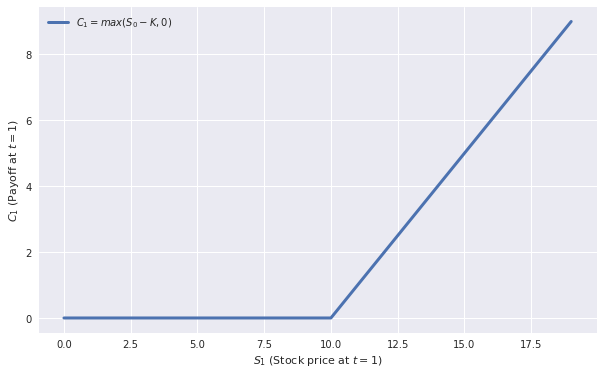

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.style.use("seaborn")
plt.plot(S1, C1, lw = 3.0, label = "$C_1 = max(S_0 - K, 0)$")
plt.ylabel("$C_1$ (Payoff at $t=1$)")
plt.xlabel("$S_1$ (Stock price at $t=1$)")
plt.legend()

## Replication Portfolio ##

If the payoff of a contingent claim $C_1 = (C_1^u, C_1^d)$ can be replicated by a linear combination of the payoff vectors of \
a bond $B$ and a stock $S$, then we say that contingent claim is *redundant*. To show it mathematically:\
\
$b \begin{bmatrix} B_1 \\ B_1 \end{bmatrix} + s \begin{bmatrix} S_1^u \\ S_1^d \end{bmatrix} = \begin{bmatrix} C_1^u \\ C_1^d \end{bmatrix}$ \
\
if the above equation is true, then we say the payoff of the contingent claim is redundant, because its payoff can already \
be replicated by a linear combination of the payoff vectors of the stock $S$ and the bond $B$.

The above problem can be represented as a system of equations. Assuming $S_1^u \neq S_1^d$, then this is a linear system \
akin to $K \underline{x} = \underline{b}$ with a unique solution: \
\
$\begin{bmatrix} B_1  S_1^u \\ B_1  S_1^d \end{bmatrix} \cdot \begin{bmatrix} b \\ s \end{bmatrix} = \begin{bmatrix} C_1^u \\ C_1^d \end{bmatrix} \rightarrow M \cdot \phi = C_1$

where the vector $\phi = \begin{bmatrix} b \\ s \end{bmatrix}$ is a vector of coefficients (weights) of bond and stock, respectively.

In [16]:
B = (10, np.array((11, 11)))  # bond price at t=0 is 10, bond price at t=1 is 11 because bond is a riskless asset.
S = (10, np.array((20, 5)))  # stock price at t=0 is 10, stock price at t=1 can either be 20 or 5.
M = np.array((B[1], S[1])).T  # Combined payoff matrix for the bond and the stock
M

array([[11, 20],
       [11,  5]])

In [17]:
K = 15  # strike price of the option
C1 = np.maximum(S[1]-K, 0)
C1  # payoff vector of the option

array([5, 0])

In [18]:
phi = np.linalg.solve(M, C1)  # solve for the replication vector of coefficients
phi
# this shows short bond with a weight of -0.1515 and buy stock with a weight of 0.3333
# and you have replicated the payoff of C1

array([-0.15151515,  0.33333333])

## Arbitrage Pricing ##

The cost of the replication portfolio is: \
\
$V_0(\phi) = \phi \cdot \begin{bmatrix} B_0 \\ S_0 \end{bmatrix}$ \
\
where \
\
$\phi:$ weights (coefficients) vector \
$B_0:$ Price of the bond at $t=0$ \
$S_0:$ Price of the stock at $t=0$ 

In [19]:
B0S0 = np.array((B[0], S[0]))

price = np.dot(phi, B0S0)

print("Value of the replication portfoilo at t=0:", price)
# Also called the arbitrage price of the contingent claim.

Value of the replication portfoilo at t=0: 1.8181818181818183


If the price of the replication portfolio at $t=0$ and the price of the contingent claim at $t=0$ are not equal, \
then we say there is an opportunity of **arbitrage** in the economy. Thus, the price of the contingent claim at $t=0$ \
must be equal to $1,8182$: the price of the replication portfolio.

If there is an arbitrage opportunity in the economy, then it is possible to sell a portfolio for profit at $t=0$ and have neutral payoffs $\begin{bmatrix} 0 \\ 0 \end{bmatrix}$ at $t=1$

For example, suppose that the price of the call option $C$ at $t=0$ is $C_0 = 2$. Then we can construct the following negative-price replication portfolio today for a profit but do not have to pay anything at $t=1:$ \
\
$-C_1 + M \phi^* = \begin{bmatrix} 0 \\ 0 \end{bmatrix} \rightarrow$ This is the payoff at $t=1$ which is equal to $0$. \
\
$-C_0 + \begin{bmatrix} B_0 \\ S_0 \end{bmatrix} \cdot \phi^* = -0.1818 \rightarrow$ This is the cost to construct the portfolio at $t=0$ which is negative. Thus, there is a risk-free profit in this economic model.

## Market Completeness ##

If **every** contingent claim can be replicated by a portfolio consisting of the traded financial assets in the economy (in our case bond $B$ and stock $S$), then we can say that economy has a **complete market model**. Therefore, every contingent claim can be priced by replication and arbitrage.

This means in the system of equations \
\
 $\begin{bmatrix} B_1 S_1^u \\ B_1 S_1^d \end{bmatrix} \cdot \begin{bmatrix} b \\ s \end{bmatrix} = \begin{bmatrix} C_1^u \\ C_1^d \end{bmatrix} \rightarrow M \cdot \phi = C_1$ \
\
the column vectors creating the matrix $M$ must be **linearly independent** ($S_1^u \neq S_1^d$ in our case) so that there can be unique solutions for every contingent claim payoff vector $C_1 = \begin{bmatrix} C_1^u \\ C_1^d \end{bmatrix}$ \
\
and thus, the system $M \cdot \phi = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$ must only have $\phi^* = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$ as a solution.

**In complete markets, any contingent claim $C$ has a unique solution $\phi^*$ in a unique replication portfolio**.

Now let's try constructing unique replication portfolios for all possible contingent claims, with **no shorting allowed** *(positions are positive and add up to 1)*

In [20]:
rng = np.random.default_rng(100)  # fix the seed for the random number generator
n = 1000  # number of values to be simulated
b = rng.uniform(0, 1, n)  # create a uniform[0, 1] array with length n
b[:10]  # b is an array of weights of the bond.

array([0.83498163, 0.59655403, 0.28886324, 0.04295157, 0.9736544 ,
       0.5964717 , 0.79026316, 0.91033938, 0.68815445, 0.18999147])

In [21]:
s = 1-b
s[:10]  # s is an array of weights of the stock.

array([0.16501837, 0.40344597, 0.71113676, 0.95704843, 0.0263456 ,
       0.4035283 , 0.20973684, 0.08966062, 0.31184555, 0.81000853])

In [22]:
B = (10, np.array((11, 11)))
S = (10, np.array((20, 5)))

def portfolio(b, s, B, S):
    """Constructs a portfolio which has a payoff vector b*B + s*S
    and returns the payoff vector.

    Args:
        b (ndarray): array of weights of the bond
        s (ndarray): array of weights of the stock
        B (tuple): B[0] is the price of bond at t=0, B[1] is the possible payoff vector of bond at t=1
        S (tuple): S[0] is the price of stock at t=0, S[1] is the possible payoff vector of stock at t=1
    
    Returns:
        P (ndarray): Portfolio payoff vector at t=1
    """
    
    P = np.array([b[i]*B[1] + s[i]*S[1] for i in range(n)])
    
    return P

A = portfolio(b, s, B, S)  # A comprises the payoffs of all the contingent claims that are replicable by trading the financial assets in the economy.
A  # The first column A[:, 0] is the payoff in the up state, the second column A[:, 1] is the payoff in the down state.

array([[12.48516533, 10.00988978],
       [14.63101376,  8.57932416],
       [17.40023082,  6.73317945],
       ...,
       [12.53069938,  9.97953375],
       [19.74103643,  5.17264238],
       [18.55379799,  5.96413468]])

Text(0.5, 1.0, 'positions add up to 1, shorting NOT allowed')

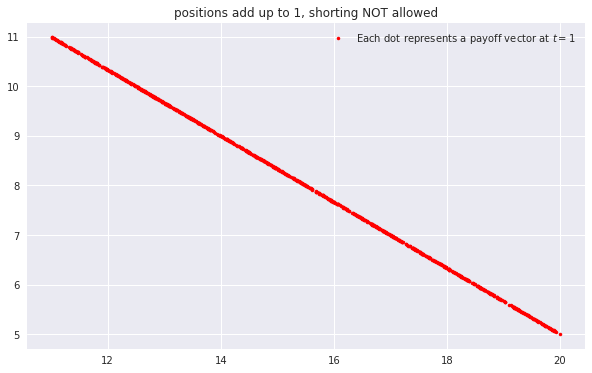

In [23]:
plt.figure(figsize=(10, 6))
plt.style.use("seaborn")
plt.plot(A[:, 0], A[:, 1], "r.", label="Each dot represents a payoff vector at $t=1$")
plt.legend()
plt.title("positions add up to 1, shorting NOT allowed")

Here, we asserted portfolio positions (weights) add up to 1. However, if we put no boundary on the sum of the weights, then:

In [24]:
s = rng.random(n)

A = portfolio(b, s, B, S)
A

array([[19.86232075, 11.85417864],
       [26.35796184, 11.51106118],
       [11.64939184,  5.2954697 ],
       ...,
       [17.69705865, 11.27112357],
       [ 5.67190743,  1.65536013],
       [16.68660962,  5.49733758]])

Text(0.5, 1.0, 'positions may exceed 1, shorting NOT allowed')

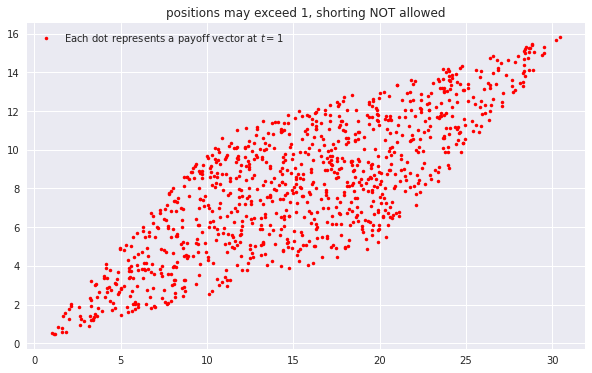

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(A[:, 0], A[:, 1], "r.", label="Each dot represents a payoff vector at $t=1$")
plt.legend()
plt.title("positions may exceed 1, shorting NOT allowed")

And moreover, if we add shorting:

Text(0.5, 1.0, 'positions may exceed 1, shorting allowed')

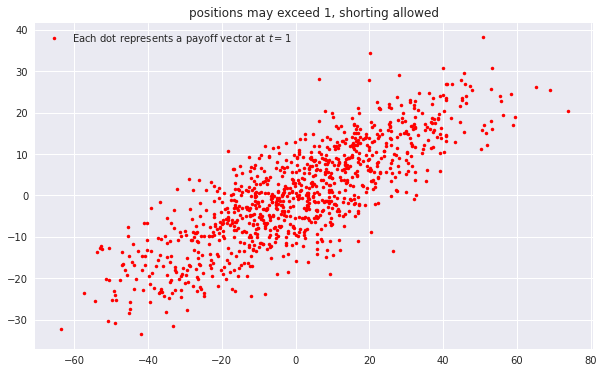

In [26]:
b = rng.standard_normal(n)
s = rng.standard_normal(n)

A = portfolio(b, s, B, S)
plt.figure(figsize=(10, 6))
plt.plot(A[:, 0], A[:, 1], "r.", label="Each dot represents a payoff vector at $t=1$")
plt.legend()
plt.title("positions may exceed 1, shorting allowed")

If $b$ and $s$ were allowed to take *any* arbitrary value on the real line, then this scatter plot would span all $\mathbb{R}^2$

## Arrow-Debreu Securities ##

An Arrow-Debreu is a special case of contingent claim which pays exactly 1 unit in a specified future state. For example, in a two-state economic model: \
\
$A_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \rightarrow A_1$ is an Arrow-Debreu security which pays 1 unit at $t=1$ if the state is **up**. \
\
$A_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix} \rightarrow A_2$ is an Arrow-Debreu security which pays 1 unit at $t=1$ if the state is **down**.

Then, the replication problem for the Arrow-Debreu securities are: \
\
$M \cdot \phi = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ \
\
and \
\
$M \cdot \phi = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

Consider two Arrow-Debreu securities with following price processes: \
\
$\gamma^u = (\gamma_0^u, (1, 0)^T) \rightarrow$ the payoff structure of $A_1$ which pays $1$ unit in the **up** state and pays $0$ unit in the **down** state at $t=1$ and has a price of $\gamma_0^u$ at $t=0$ \
\
$\gamma^d = (\gamma_0^d, (1, 0)^T) \rightarrow$ the payoff structure of $A_2$ which pays $0$ unit in the **up** state and pays $1$ unit in the **down** state at $t=1$ and has a price of $\gamma_0^d$ at $t=0$

Then we define $M^\gamma$ which is a payoff matrix consisting of the payoffs of Arrow-Debreu securities from which we are going to replicate any contingent claim
payoff at $t=1$ which is $C_1 = \begin{bmatrix} C_1^u \\ C_1^d \end{bmatrix}$. \
\
$M^\gamma = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

Then the replication problem is the following: \
\
$M^\gamma \cdot \phi^* = C_1 \rightarrow \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \cdot \phi^* = \begin{bmatrix} C_1^u \\ C_1^d \end{bmatrix}$

And trivially, the solution is \
\
$\phi^* = \begin{bmatrix} C_1^u \\ C_1^d \end{bmatrix}$

As we can see, Arrow-Debreu securities simplify solving the replication problem of contingent claims.

## Martingale Pricing ##

Martingale measure is a probability vector which makes the discounted expected value of the payoff vector of a risky stock equal to its current price $S_0:$ \
\
$S_0 = \Large\frac{1}{1+i} \cdot \small E^Q(S_1)$ where $E^Q(S_1) = (S_1^u, S_1^d) \cdot (q, 1-q) = S_1 \cdot Q$

where, \
\
$E^Q(S_1):$ Expected value of the stock payoff at $t=1$ under the martingale probability measure $Q$ \
$S_1:$ payoff vector of the stock $S$ at $t=1$ \
$Q:$ martingale probability measure \
$i:$ interest rate where $i = \large\frac{B_1 - B_0}{B_0}$ holds true.

let $q \equiv Q(u)$ where $q$ is the probability of the up state $q \equiv P(${up state happens}$)$ and $(q, 1-q)$ is the martingale probability measure of our two-state economic model.

Then, because of our discounted price definition for martingale measure above, we get the following equation: \
\
$ q S_1^u + (1-q) S_1^d = E^Q(S_1) = S_0 (1+i)$

after some simple algebra: \
\
$q = \Large\frac{S_0 \cdot (1+i) - S_1^d}{S_1^u - S_1^d}$

For $q$ to be a valid probability measure, $0 < q < 1$ must hold and therefore the following equation must also hold: \
\
$S_1^u > S_0 \cdot (1+i) > S_1^d$

If the above equations are not true, if for example $S_0 (1+i) \le S_1^d$ then a simple arbitrage is to buy and hold the asset. \
On the other hand if $S_0 (1+i) \ge S_1^u$ then a simple arbitrage is to short sell the asset at $t=0$ and cover the short at $t=1$.

If equality holds on the above relationships, for example if $S_0 (1+i) = S_1^d$ then there is a *weak arbitrage* or *statistical arbitrage* where buy-and-hold the stock $S$ is a risk-free trade on average but not always. And vica versa for shorting like above.

In [27]:
# Calculation of risk-free interest rate from the payoff of the bond
i = (B[1][1] - B[0]) / B[0]
i

0.1

In [28]:
# Calculate martingale probability measure (q, 1-q)
q = (S[0]*(1+i) - S[1][1]) / (S[1][0] - S[1][1])
Q = np.array((q, 1-q))
Q

array([0.4, 0.6])

## First Fundamental Theorem of Asset Pricing (1FTAP) ##
1) A martingale measure exists.
2) The economy is arbitrage free.

## Pricing by Expectation ##

We can price all of the contingent claims in a risk-free economy by discounting their expected payoffs according to the martingale probability at $t=1:$ \
\
$C_0 = \Large\frac{E^Q(C_1)}{1+i} = \frac{Q \cdot C_1}{1+i} $

In [29]:
i = 0.1
C1 = np.array((5, 0))
Q = np.array((q, 1-q))
martingale_C0 = np.dot(Q, C1) / (1+i)  # discounting expected cash flow according to martingale probability vector.
martingale_C0  # martingale price is the same as arbitrage price, as expected.

1.8181818181818181

## Second Fundamental Theorem of Asset Pricing (2FTAP) ##
1) The martingale measure is unique.
2) The market model is complete.

## Mean-Variance Portfolios ##

The expected value (mean) of the portfolio payoff is equal to: \
\
$E[M \cdot \phi] = b \cdot B_1 + s \cdot E^P[S_1]$ \
\
where \
\
$E^P[S_1]:$ Expected value of the payoff vector of the stock $S$ at $t=1$.

Variance of the portfolio payoff is equal to: \
\
$\sigma^2(M \cdot \phi) = \sigma^2(s \cdot S_1) = s^2 \cdot \sigma^2(S_1)$ \
\
because the payoff of the bond $B_1$ is a constant and thus has no contribution to the portfolio variance.

In [30]:
B = (10, np.array((11, 11)))
S = (10, np.array((20, 5)))
M = np.array((B[1], S[1])).T  # payoff matrix
M

array([[11, 20],
       [11,  5]])

In [31]:
M0 = np.array((B[0], S[0]))  # price vector at t=0
M0

array([10, 10])

In [32]:
r = M / M0 - 1  # Rate of returns matrix
r

array([[ 0.1,  1. ],
       [ 0.1, -0.5]])

In [33]:
P = np.array((0.5, 0.5))  # regular probability measure
P

array([0.5, 0.5])

In [34]:
s = 0.55  # weight of the stock in portfolio
b = 1-s  # weight of the bond in portfolio
phi = (b, s)
phi

(0.44999999999999996, 0.55)

In [35]:
# Expected portfolio return
weighted_payoff = np.dot(r, phi)  # rates of return vector with appropriate weights (b, s) 
mu = np.dot(P, weighted_payoff)
mu  # expected rate of return of portfolio

0.18250000000000005

In [36]:
var = s**2 * r[:, 1].var()
sigma = var ** 0.5
sigma  # volatility of rate of returns. note that sigma lies between the volatility of the bond (0) and the volatility of the stock (0.75)

0.41250000000000003

In [37]:
values = np.linspace(0, 1, 25)  # 25 linearly spaced points between 0 and 1
values

array([0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
       0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
       0.41666667, 0.45833333, 0.5       , 0.54166667, 0.58333333,
       0.625     , 0.66666667, 0.70833333, 0.75      , 0.79166667,
       0.83333333, 0.875     , 0.91666667, 0.95833333, 1.        ])

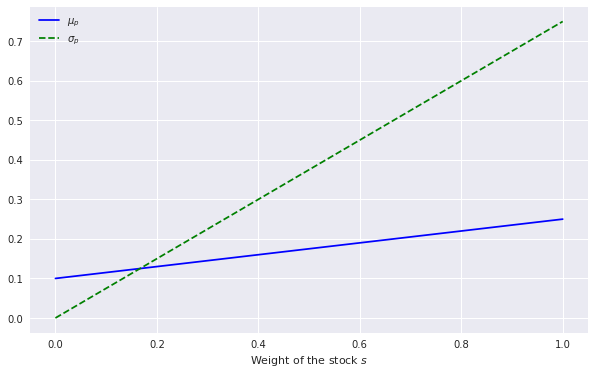

In [38]:
mu_array = []
sigma_array = []
R = np.array([(0.1, 1), (0.1, -0.5)])
P = np.array((0.5, 0.5))
for s in values:
    phi = (1-s, s)
    weighted_returns = np.dot(R, phi)
    mu = np.dot(P, weighted_returns)
    mu_array.append(mu)
    
    sigma = s * R[:, 1].std()
    sigma_array.append(sigma)

plt.figure(figsize=(10, 6))
plt.style.use("seaborn")
plt.plot(values, mu_array, "b-", label = "$\mu_p$")
plt.plot(values, sigma_array, "g--", label = "$\sigma_p$")
plt.xlabel("Weight of the stock $s$")
plt.legend()

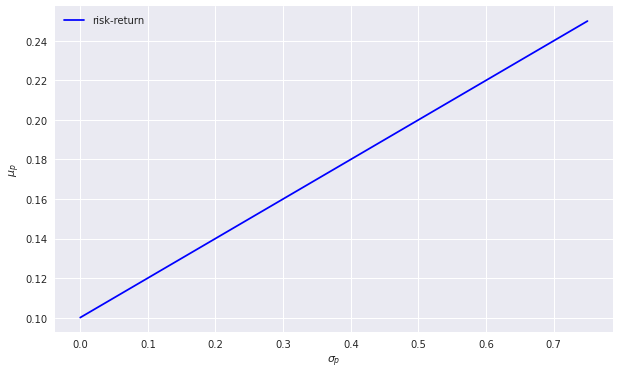

In [39]:
plt.figure(figsize=(10, 6))
plt.style.use("seaborn")
plt.plot(sigma_array, mu_array, "b-", label="risk-return")
plt.xlabel("$\sigma_p$")
plt.ylabel("$\mu_p$")
plt.legend()